# Data Pre-processing

#### Understanding structure of data 
Identifying Continuous and Categorical data
Handling Missing data
Methods to identify outliers
Measuring centrality of data
Measuring spread of data

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import seaborn as sns
import datetime as dt
import random
import scipy.stats as stats
%matplotlib inline 
sns.set()
from pandas.api.types import CategoricalDtype
from plotnine import *



In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## Reading Data

In [2]:
df = pd.read_csv("Data/owid-covid-data.csv")

## Understanding structure of data

#### Looking at top 10 rows of data

In [3]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [4]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
33407,NaN,NaN,International,2020-02-23,634.0,0.0,2.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33408,NaN,NaN,International,2020-02-24,691.0,57.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33409,NaN,NaN,International,2020-02-25,691.0,0.0,3.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33410,NaN,NaN,International,2020-02-26,691.0,0.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33411,NaN,NaN,International,2020-02-27,705.0,14.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33412,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33413,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33414,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33415,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33416,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looking at all the variables and their types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33417 entries, 0 to 33416
Data columns (total 34 columns):
iso_code                           33353 non-null object
continent                          33141 non-null object
location                           33417 non-null object
date                               33417 non-null object
total_cases                        33062 non-null float64
new_cases                          33062 non-null float64
total_deaths                       33062 non-null float64
new_deaths                         33062 non-null float64
total_cases_per_million            32998 non-null float64
new_cases_per_million              32998 non-null float64
total_deaths_per_million           32998 non-null float64
new_deaths_per_million             32998 non-null float64
new_tests                          10401 non-null float64
total_tests                        10647 non-null float64
total_tests_per_thousand           10647 non-null float64
new_tests_per_thousand   

There are 33417 observations and 34 columns where 5 variables are of categorical data type and the remaining 29 variables are of numerical data types

#### The following is a list of names of variables in this data set


In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

#### Converting data types

In [7]:
df['date']= pd.to_datetime(df['date'])
df['date'] = df['date'].map(dt.datetime.toordinal)

#### Describing and Summarizing numerical or continuous variables

In [8]:
df.describe()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,33417.000000,3.306200e+04,33062.000000,33062.000000,33062.00000,32998.000000,32998.000000,32998.000000,32998.000000,10401.000000,...,29919.000000,29708.000000,19865.000000,30083.000000,31104.000000,23877.000000,23591.000000,13764.000000,27353.000000,32951.000000
mean,737551.449741,5.091939e+04,1010.762809,2655.291634,39.93243,1103.657007,17.858746,40.909829,0.533204,16320.258341,...,5.990319,21546.066343,11.489011,249.517591,8.039533,10.990606,32.629508,53.246010,3.146980,74.244388
std,53.610095,5.180225e+05,9309.139517,25233.329557,347.73264,2674.940362,62.928423,123.250689,3.006846,59168.420750,...,4.362110,20697.420278,18.736936,117.957827,4.116805,10.504692,13.328649,31.456423,2.549325,7.316460
min,737424.000000,0.000000e+00,-29726.000000,0.000000,-1918.00000,0.000000,-437.881000,0.000000,-41.023000,-3743.000000,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,737515.000000,2.100000e+01,0.000000,0.000000,0.00000,8.521500,0.000000,0.000000,0.000000,805.000000,...,2.162000,6171.884000,0.500000,153.493000,5.310000,1.900000,21.400000,22.863000,1.380000,70.390000
50%,737556.000000,4.460000e+02,5.000000,9.000000,0.00000,155.458000,0.773000,2.043000,0.000000,2766.000000,...,4.458000,15183.616000,1.700000,235.954000,7.110000,6.434000,31.400000,55.182000,2.540000,75.860000
75%,737596.000000,5.066500e+03,102.000000,107.000000,2.00000,936.628000,10.572000,21.692000,0.140000,9307.000000,...,9.720000,33132.320000,15.000000,318.949000,10.080000,19.600000,40.900000,83.741000,4.210000,80.100000
max,737635.000000,1.670892e+07,284710.000000,660123.000000,10512.00000,38138.741000,4944.376000,1237.551000,200.040000,929838.000000,...,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


### Feature Selection
#### Dropping unnecessary and redundant numerical columns before analyzing data

In [9]:
df.isna().sum()

iso_code                              64
continent                            276
location                               0
date                                   0
total_cases                          355
new_cases                            355
total_deaths                         355
new_deaths                           355
total_cases_per_million              419
new_cases_per_million                419
total_deaths_per_million             419
new_deaths_per_million               419
new_tests                          23016
total_tests                        22770
total_tests_per_thousand           22770
new_tests_per_thousand             23016
new_tests_smoothed                 21897
new_tests_smoothed_per_thousand    21897
tests_units                        21129
stringency_index                    6287
population                            64
population_density                  1507
median_age                          3343
aged_65_older                       3779
aged_70_older   

There are a total number of 33417 observations and the following variables have more than 60% of data as missing values. 

new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_units, 

and the variable "handwashing_facilities"  has 19653 close to 60% of data as missing values.

Therefore, these variables should be removed in order to avoid any bias in modeling. The variable extreme_poverty is also having 40% of its values as missing values. However, we will try to consider this variable as it has less than 50% of its missing values. 


In [10]:
df.drop(['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'handwashing_facilities'], axis = 1, inplace = True)

The below mentioned variables should also be removed as these are conversions per million. We would prefer to use per million numbers in general compared to just numbers, however, there are more missing values in variables using per million as conversions. Therefore, we stick to the original variables.

total_cases_per_million, new_cases_per_million, total_deaths_per_million, and new_deaths_per_million

In [11]:
df.drop(['total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million'], axis = 1, inplace = True)

Because Population Density is calculated using Population, we need to remove Population

In [12]:
df.drop(['population'], axis = 1, inplace = True)

#### Describing and Summarizing categorical variables

In [13]:
df.describe(include = 'O')

,iso_code,continent,location
count,33353,33141,33417
unique,211,6,212
top,AUT,Europe,Japan
freq,212,9113,212


In [14]:
df["continent"].head()

0    Asia
1    Asia
2    Asia
3    Asia
4    Asia
Name: continent, dtype: object

In [15]:
df["continent"].tail()

33412    NaN
33413    NaN
33414    NaN
33415    NaN
33416    NaN
Name: continent, dtype: object

In [16]:
df["location"].tail()

33412    International
33413    International
33414    International
33415    International
33416    International
Name: location, dtype: object

In [17]:
df["iso_code"].tail()

33412    NaN
33413    NaN
33414    NaN
33415    NaN
33416    NaN
Name: iso_code, dtype: object

#### Drop specific rows

Looking at the categorical variables. Some of the rows for iso_code has no values and corresponding continent also doesn't have any values. Also, the corresponding location has only "International" as the values. This means there is no way to track which location in these rows belongs to which continent and such. Therefore, we should remove these rows. There are only 64 such rows with no values in iso_code variables. Therefore, removing such a small data will not affect our model. 

In [18]:
df = df.dropna(how='all', subset=['iso_code'])

#### Looking at shape of new dataset 

We now have 33353 observations instead of 33417 observations and 21 variables instead of 34 variables.

In [19]:
df.shape

(33353, 21)

All the names of variables in our current data set are listed below

In [20]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'stringency_index', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

## Graphical Exploratory Analysis

Before we go deeper into the dataset, it is good to perform some graphical exploratory analysis as we can quickly see and find issues with the data

In [21]:
df.groupby('continent').size()

continent
Africa           7479
Asia             8274
Europe           9113
North America    5047
Oceania          1253
South America    1975
dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

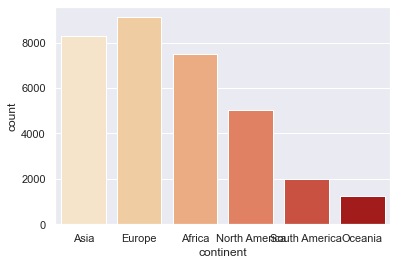

In [22]:
sns.countplot(x='continent',data=df, palette="OrRd")

The above graph shows that Europe has majority of the cases

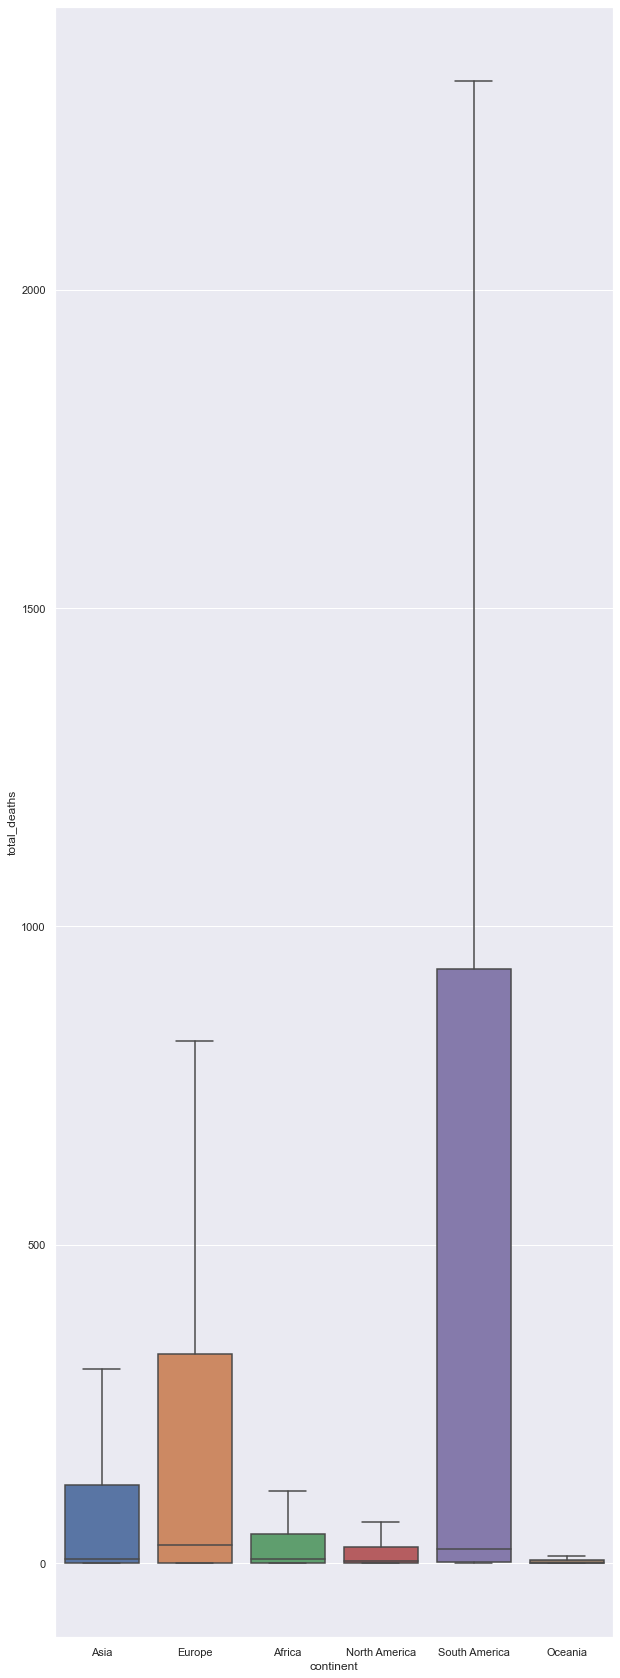

In [23]:
plt.figure(figsize=(10,30))
ax = sns.boxplot(x="continent", y="total_deaths", data=df, showfliers=False)

Based on the above boxplots, the number of deaths are highest in Europe followed by South America, Africa, Asia, North America, and Oceans.

#### Let's explore the population density in these continents

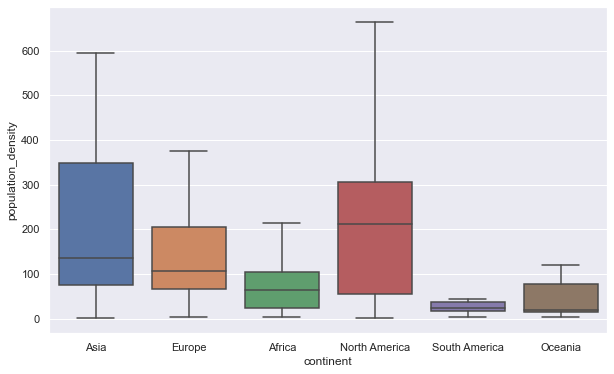

In [24]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="population_density", data=df, showfliers=False)

The above chart shows that the population density is highest in North America followed by Asia, Europe, Africa, Oceana, and last South America. Therefore, even though Europe seem to have highest number of deaths and North America among the least number of deaths, it is important to consider that North America has higher population density compared to Europe.  

Therefore, by comparing the above two plots, it is surprising that South America has the more number of deaths among all as it has the lesser population density. There can be several factors affecting the death rate. But this is probably because people in South America are not taking as good of a precaution as some other continents.Also, it is important to note that North America has high population density and surprisngly, North America has one of the least number of deaths. This means that more precautions and other methods are in place at North America when compared to Europe to beat the COVID-19 situation.

#### Let's explore the number of cases by continent

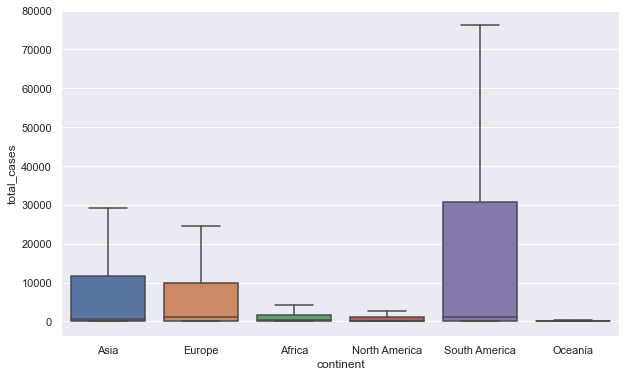

In [25]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="total_cases", data=df, showfliers=False)

Clearly, Europe and South America have the highest number of cases and so has highest number of deaths

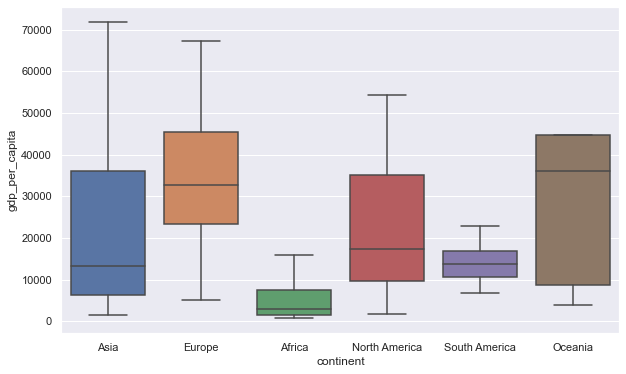

In [26]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="gdp_per_capita", data=df, showfliers=False)

Europe and Oceana are richest continents of all. Oceana has least population density and that's why less number of cases leading to lesser number of deaths. However, Europe on the other hand, is among the richest continents, ranks number third in population density and total number of cases, and still has the highest number of total deaths. So, it will be interesting to study Europe among all the continents and help them predict total number of deaths ahead of time. This will help Europe in managing the situation better to some extent. 

### Studying Europe

In [27]:
df = df[df['continent'] == "Europe"]
df = df.drop("continent", axis=1)

df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
202,ALB,Albania,737493,2.0,2.0,0.0,0.0,36.11,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
203,ALB,Albania,737494,6.0,4.0,0.0,0.0,41.67,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
204,ALB,Albania,737495,10.0,4.0,0.0,0.0,51.85,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
205,ALB,Albania,737496,11.0,1.0,1.0,1.0,51.85,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
206,ALB,Albania,737497,23.0,12.0,1.0,0.0,78.70,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57


In [28]:
df.groupby('location').size()

location
Albania                   143
Andorra                   138
Austria                   212
Belarus                   212
Belgium                   212
Bosnia and Herzegovina    139
Bulgaria                  142
Croatia                   212
Cyprus                    140
Czech Republic            212
Denmark                   212
Estonia                   212
Faeroe Islands            146
Finland                   212
France                    212
Germany                   212
Gibraltar                 132
Greece                    212
Guernsey                  132
Hungary                   148
Iceland                   212
Ireland                   210
Isle of Man               131
Italy                     212
Jersey                    132
Kosovo                    138
Latvia                    152
Liechtenstein             141
Lithuania                 212
Luxembourg                205
Macedonia                 203
Malta                     175
Moldova                   142
M

<AxesSubplot:xlabel='location', ylabel='count'>

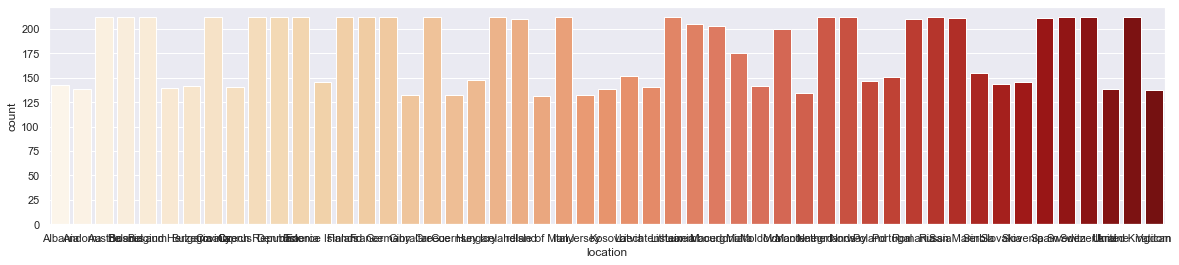

In [29]:
plt.figure(figsize=(20,4))
sns.countplot(x ='location',data=df, palette="OrRd")

C:\Users\kamsi\Anaconda3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_bin : Removed 1289 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


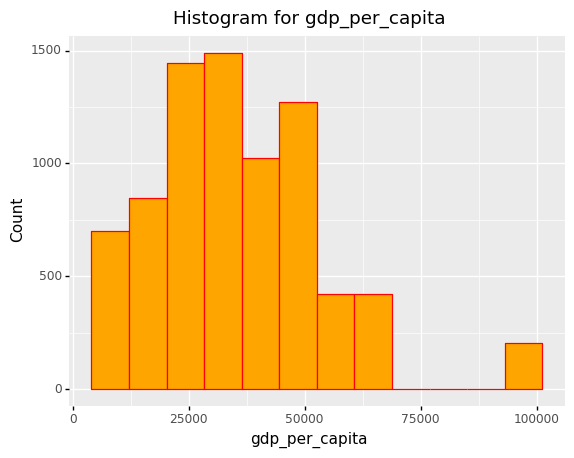

<ggplot: (-9223371934671374004)>

In [30]:
(ggplot(df, aes(x='gdp_per_capita'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for gdp_per_capita", x="gdp_per_capita", y="Count")
)

#### Median_Age

C:\Users\kamsi\Anaconda3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_bin : Removed 1638 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


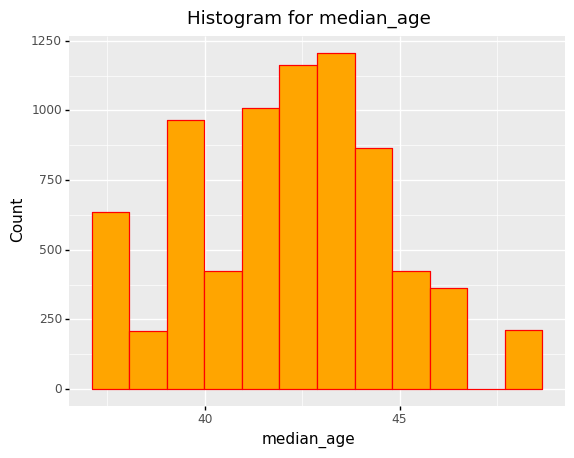

<ggplot: (-9223371934671907528)>

In [31]:
(ggplot(df, aes(x='median_age'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for median_age", x="median_age", y="Count")
)

Text(0.5, 1.0, 'Total Number of Cases vs Total Deaths')

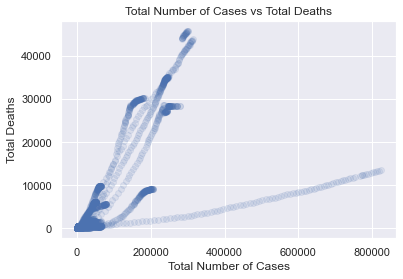

In [32]:
plt.scatter(df['total_cases'], df['total_deaths'], alpha = 0.1)
plt.xlabel("Total Number of Cases")
plt.ylabel("Total Deaths")
plt.title("Total Number of Cases vs Total Deaths")

C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matpl

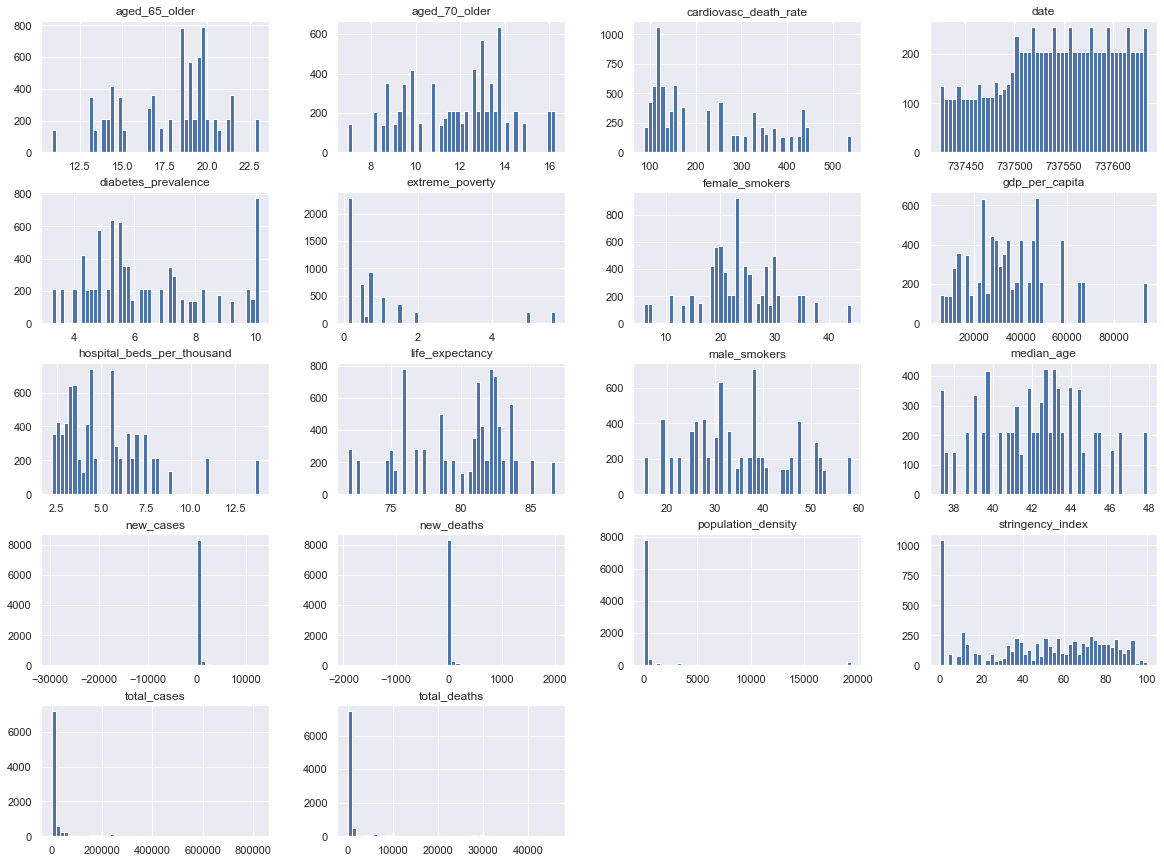

In [33]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [34]:
# Taking a look at the outcome variable: 'total_deaths'
print(df['total_deaths'].value_counts())

0.0        2651
1.0         269
9.0         142
5.0         136
10.0        125
           ... 
28413.0       1
16879.0       1
44650.0       1
2182.0        1
1693.0        1
Name: total_deaths, Length: 1973, dtype: int64


## Convert Categorical Columns to Numerical

### Get Dummy Variables

In [35]:
df = pd.get_dummies(df, columns = ['iso_code', 'location'], drop_first = True)

## Statistical Exploratory Analysis

### Describe Numeric Columns

In [36]:
df.describe(include = [np.number])

,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,...,location_San Marino,location_Serbia,location_Slovakia,location_Slovenia,location_Spain,location_Sweden,location_Switzerland,location_Ukraine,location_United Kingdom,location_Vatican
count,9113.000000,9027.000000,9027.000000,9027.000000,9027.000000,7207.000000,8712.000000,7475.000000,7475.000000,7320.000000,...,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000
mean,737542.532536,24474.764374,307.505262,2088.278609,22.369669,47.684135,650.715591,42.144187,17.862396,11.895578,...,0.023154,0.017009,0.015802,0.016021,0.023154,0.023263,0.023263,0.015143,0.023263,0.015033
std,57.229586,73462.064768,1138.343507,6821.101474,101.066729,30.470777,2902.621269,2.555188,2.734599,2.198739,...,0.150400,0.129311,0.124714,0.125563,0.150400,0.150747,0.150747,0.122129,0.150747,0.121693
min,737424.000000,0.000000,-29726.000000,0.000000,-1918.000000,0.000000,3.404000,37.300000,10.864000,6.955000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,737501.000000,70.000000,0.000000,0.000000,0.000000,19.440000,65.180000,40.300000,15.070000,9.842000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,737546.000000,1097.000000,11.000000,29.000000,0.000000,51.850000,106.749000,42.400000,18.577000,12.325000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,737591.000000,9861.000000,132.000000,329.000000,4.000000,74.070000,205.859000,43.500000,19.718000,13.433000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,737635.000000,823515.000000,12640.000000,45878.000000,2004.000000,100.000000,19347.500000,47.900000,23.021000,16.240000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Handling Missing Values

As seen from above df.isnull().sum(), there are several missing values in this dataset. Therefore, we first need to handle these missing values before proceeding further. We will use SimpleImputer for this.

In [37]:
df.isnull().sum()

date                        0
total_cases                86
new_cases                  86
total_deaths               86
new_deaths                 86
                           ..
location_Sweden             0
location_Switzerland        0
location_Ukraine            0
location_United Kingdom     0
location_Vatican            0
Length: 118, dtype: int64

In [38]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df)
df = pd.DataFrame(data=imputer.transform(df) , columns=df.columns)

## Training - Testing Model

In [39]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('total_deaths', 1)
y = df.total_deaths

In [40]:
X.isnull().sum().sort_values(ascending=False)

location_Vatican      0
iso_code_ITA          0
iso_code_FIN          0
iso_code_FRA          0
iso_code_FRO          0
                     ..
location_Germany      0
location_Gibraltar    0
location_Greece       0
location_Guernsey     0
date                  0
Length: 117, dtype: int64

In [41]:
# Feature Scaling 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
reg = LinearRegression()
steps = [('scaling', scaler), ('regression', reg)] 
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

pipeline.fit(X_train, y_train) 
y_pred = pipeline.predict(X_test) 
pipeline.score(X_test, y_test)

0.7564315841332829